# Estadística Bidimensional

In [2]:
import numpy as np
import pandas as pd

# read in from csv using pd.read_csv
# be sure to use the file path where you saved the data
housing_price_index = pd.read_csv('https://raw.githubusercontent.com/AngelBerihuete/article-resources/master/Housing%20Price%20Index%20Regression/monthly-hpi.csv')
unemployment = pd.read_csv('https://raw.githubusercontent.com/AngelBerihuete/article-resources/master/Housing%20Price%20Index%20Regression/unemployment-macro.csv')


In [2]:
df = housing_price_index.merge(unemployment, on='date')

In [3]:
df.head()

,date,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers
0,2010-11-01,186.07,16.9,8696,2531,6708,5.7,63.0
1,2010-12-01,183.27,16.6,8549,2609,6899,6.4,61.2
2,2011-01-01,181.35,16.2,8393,2800,6816,6.5,60.1
3,2011-02-01,179.66,16.0,8175,2730,6741,6.4,60.2
4,2011-03-01,178.84,15.9,8166,2434,6735,6.4,60.3


## Cálculo de una medida de asociación

### Covarianza

In [4]:
df['housing_price_index'].cov(df['total_unemployed'])

-45.621300799086754

### Correlación

In [38]:
df['housing_price_index'].corr(df['total_unemployed'], method='pearson')

#pearson : standard correlation coefficient
#kendall : Kendall Tau correlation coefficient
#spearman : Spearman rank correlation

-0.9719223250192387

## Cálculo de un modelo para la relación entre las variables: método mínimos cuadrados

El modelo de regresión simple utiliza una única variable predictora/independiente/explicativa para intentar explicar otra variable dependiente/explicada. El modelo de regresión lineal puede escribirse como:

$$y_i = \alpha + \beta \cdot x_i + \epsilon_i, $$


donde:

* $y$ = variable dependiente

* $\beta$ = coeficiente de regresión

* $\alpha$ = constante (ordenada en el origen)

* $x$ =variable predictora (o independiente)

* $\epsilon$ = término de error, el cual recoge la variabilidad/incertidumbre que no puede explicarse.

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

In [40]:
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.945
Model:                             OLS   Adj. R-squared:                  0.944
Method:                  Least Squares   F-statistic:                     1211.
Date:                 Mon, 23 Oct 2017   Prob (F-statistic):           2.36e-46
Time:                         13:49:32   Log-Likelihood:                -216.53
No. Observations:                   73   AIC:                             437.1
Df Residuals:                       71   BIC:                             441.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          314.3908      3.154     99.673      0.000     308.101     320.680
total_unemployed    -8.3700      0.240    -34.804      0.000      -8.849      -7.890
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.284
Skew:                           0.430   Prob(JB):                        0.319
Kurtosis:                       2.898   Cond. No.                         74.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Populating the interactive namespace from numpy and matplotlib


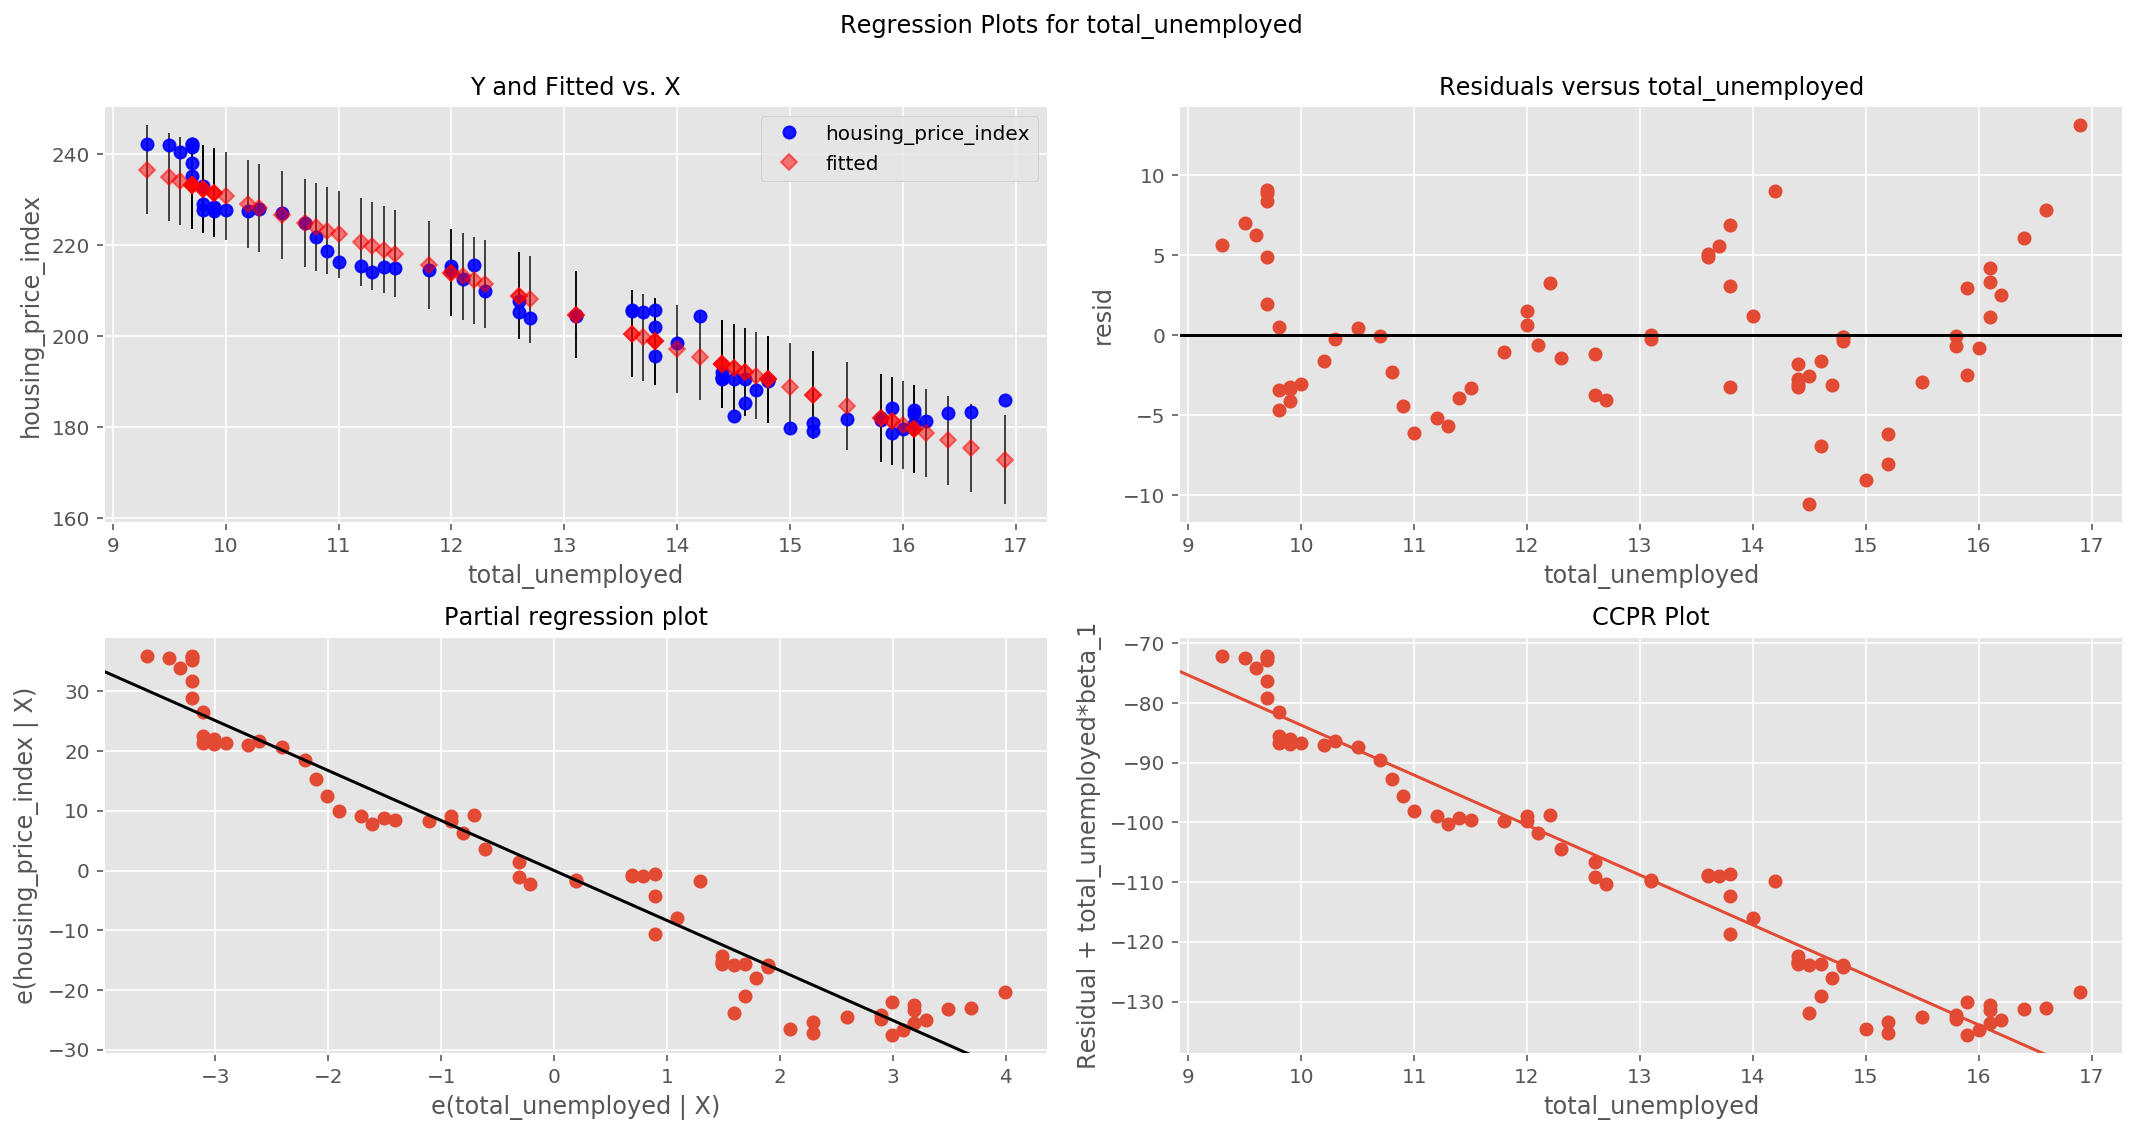

In [41]:
# this produces our four regression plots for total_unemployed

# To see the plots inline, even if you have not started the notebook via "ipython notebook --pylab=inline"
%pylab inline
%config InlineBackend.figure_format = 'retina' #[Truco] Resolución para pantallas HDPI

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

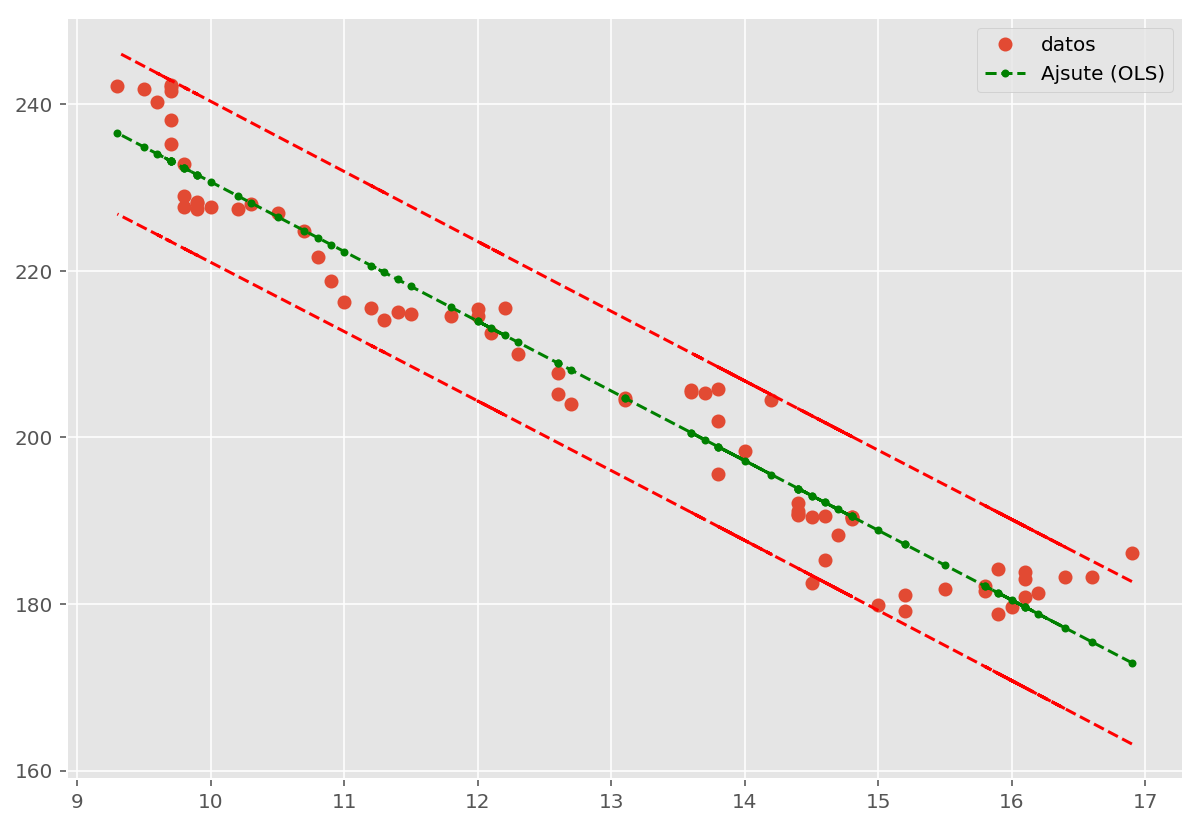

In [32]:
# this produces our trend line

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

# predictor variable
x = df[['total_unemployed']]
# dependent variable
y = df[['housing_price_index']]

# retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="datos")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="Ajsute (OLS)")
# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');